# Ejercicios ensembling
En este ejercicio vas a realizar prediciones sobre un dataset de ciudadanos indios diabéticos. Se trata de un problema de clasificación en el que intentaremos predecir 1 (diabético) 0 (no diabético). Todas las variables son numércias.

### 1. Carga las librerias que consideres comunes al notebook

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Lee los datos de [esta direccion](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv)
Los nombres de columnas son:
```Python
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
```

In [3]:
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

df = pd.read_csv(url, names=names)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()


,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


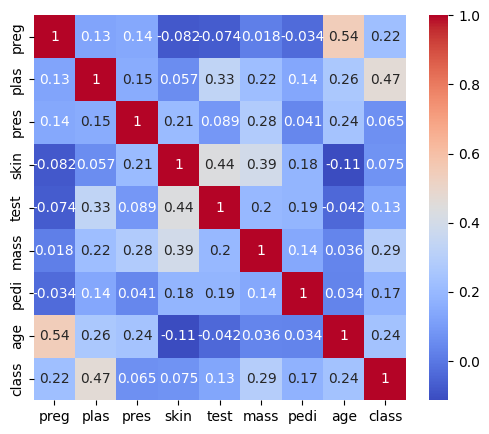

In [13]:
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


### 3. Bagging
Para este apartado tendrás que crear un ensemble utilizando la técnica de bagging ([BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)), mediante la cual combinarás 100 [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). Recuerda utilizar también [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) con 10 kfolds.

**Para este apartado y siguientes, no hace falta que dividas en train/test**, por hacerlo más sencillo. Simplemente divide tus datos en features y target.

Establece una semilla

In [10]:
seed = 7

In [14]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold

X = df.drop('class', axis=1)
y = df['class']

seed = 7

dtc = DecisionTreeClassifier()

model = BaggingClassifier(base_estimator=dtc, n_estimators=100, random_state=seed)

kfold = KFold(n_splits=10, random_state=seed, shuffle=True)

results_cv = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

print('Accuracy: %.3f%%' % (results_cv.mean() * 100))


C:\Users\horta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\horta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\horta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\horta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-pac

Accuracy: 75.783%


In [15]:
results_cv.mean()

0.7578263841421736

### 4. Random Forest
En este caso entrena un [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) con 100 árboles y un `max_features` de 3. También con validación cruzada

In [23]:
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier(n_estimators=100, max_features=3, random_state=seed)

results_cv_rfc = cross_val_score(model_rfc, X, y, cv=kfold, scoring='accuracy')
print('Accuracy: %.3f%%' % (results_cv_rf.mean() * 100))

Accuracy: 75.911%


### 5. AdaBoost
Implementa un [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) con 30 árboles.

In [18]:
from sklearn.ensemble import AdaBoostClassifier

model_ada = AdaBoostClassifier(n_estimators=30, random_state=seed)

results_cv_ada = cross_val_score(model_ada, X, y, cv=kfold, scoring='accuracy')

print('Accuracy: %.3f%%' % (results_cv_ada.mean() * 100))


Accuracy: 75.528%


### 6. GradientBoosting
Implementa un [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) con 100 estimadores

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier(n_estimators=100, random_state=seed)

results_cv_gb = cross_val_score(model_gb, X, y, cv=kfold, scoring='accuracy')

print('Accuracy: %.3f%%' % (results_cv_gb.mean() * 100))


Accuracy: 75.789%


### 7. XGBoost
Para este apartado utiliza un [XGBoostClassifier](https://docs.getml.com/latest/api/getml.predictors.XGBoostClassifier.html) con 100 estimadores. XGBoost no forma parte de la suite de modelos de sklearn, por lo que tendrás que instalarlo con pip install

In [20]:
!pip install xgboost

     ---------------------------------------- 0.0/70.9 MB ? eta -:--:--
     ---------------------------------------- 0.2/70.9 MB 4.8 MB/s eta 0:00:15
     ---------------------------------------- 0.6/70.9 MB 7.3 MB/s eta 0:00:10
      --------------------------------------- 1.2/70.9 MB 9.7 MB/s eta 0:00:08
     - -------------------------------------- 2.2/70.9 MB 12.6 MB/s eta 0:00:06
     - -------------------------------------- 2.8/70.9 MB 13.8 MB/s eta 0:00:05
     - -------------------------------------- 3.0/70.9 MB 12.7 MB/s eta 0:00:06
     - -------------------------------------- 3.1/70.9 MB 10.0 MB/s eta 0:00:07
     - -------------------------------------- 3.4/70.9 MB 9.3 MB/s eta 0:00:08
     - -------------------------------------- 3.5/70.9 MB 8.9 MB/s eta 0:00:08
     -- ------------------------------------- 3.6/70.9 MB 8.0 MB/s eta 0:00:09
     -- ------------------------------------- 3.8/70.9 MB 7.8 MB/s eta 0:00:09
     -- ------------------------------------- 3.9/70.9 


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\horta\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [21]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier(n_estimators=100, random_state=seed, use_label_encoder=False, eval_metric='logloss')

results_cv_xgb = cross_val_score(model_xgb, X, y, cv=kfold, scoring='accuracy')

print('Accuracy: %.3f%%' % (results_cv_xgb.mean() * 100))


C:\Users\horta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\horta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\horta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\horta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\s

Accuracy: 72.526%


C:\Users\horta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\horta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


### 8. Resultados
Crea un series con los resultados y sus algoritmos, ordenándolos de mayor a menor

In [24]:
result = [results_cv.mean(), results_cv_rfc.mean(), results_cv_ada.mean(), results_cv_gb.mean(), results_cv_xgb.mean()]
models = ['Bagging DT', "Random Forest", "Ada Boost", "GradientBoosting", "XGBoost"]

resultados = pd.Series(result, models).sort_values(ascending=False)
resultados

Random Forest       0.759108
GradientBoosting    0.757895
Bagging DT          0.757826
Ada Boost           0.755280
XGBoost             0.725256
dtype: float64

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

model_rfc.fit(X_train, y_train)

y_pred_rfc = model_rfc.predict(X_test)

accuracy_rfc = accuracy_score(y_test, y_pred_rfc)

print('La precisión del modelo de Random Forest en el conjunto de test es: {:.2f}%'.format(accuracy_rfc * 100))


La precisión del modelo de Random Forest en el conjunto de test es: 79.22%


In [32]:
model_bagging.fit(X_train, y_train)

y_pred_bagging = model_bagging.predict(X_test)

accuracy_bagging = accuracy_score(y_test, y_pred_bagging)

print('La precisión del modelo de Bagging en el conjunto de test es: {:.2f}%'.format(accuracy_bagging * 100))


C:\Users\horta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


La precisión del modelo de Bagging en el conjunto de test es: 79.22%


In [33]:
from sklearn.ensemble import AdaBoostClassifier

model_ada = AdaBoostClassifier(n_estimators=30, random_state=seed)

model_ada.fit(X_train, y_train)

y_pred_ada = model_ada.predict(X_test)

accuracy_ada = accuracy_score(y_test, y_pred_ada) # este ya está bien

print('La precisión del modelo de AdaBoost en el conjunto de test es: {:.2f}%'.format(accuracy_ada * 100))

accuracy_ada = accuracy_ada



La precisión del modelo de AdaBoost en el conjunto de test es: 75.97%


In [34]:
from sklearn.ensemble import GradientBoostingClassifier

# Crear el modelo de Gradient Boosting
model_gb = GradientBoostingClassifier(n_estimators=100, random_state=seed)

# Entrenar el modelo con los datos de entrenamiento
model_gb.fit(X_train, y_train)

# Hacer predicciones con los datos de prueba
y_pred_gb = model_gb.predict(X_test)

# Calcular la precisión del modelo
accuracy_gb = accuracy_score(y_test, y_pred_gb)

print('La precisión del modelo de Gradient Boosting en el conjunto de test es: {:.2f}%'.format(accuracy_gb * 100))

accuracy_gb = accuracy_gb


La precisión del modelo de Gradient Boosting en el conjunto de test es: 79.22%


In [35]:

import xgboost as xgb

model_xgb = xgb.XGBClassifier(n_estimators=100, random_state=seed)

model_xgb.fit(X_train, y_train)

y_pred_xgb = model_xgb.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print('La precisión del modelo de XGBoost en el conjunto de test es: {:.2f}%'.format(accuracy_xgb * 100))

accuracy_xgb = accuracy_xgb


La precisión del modelo de XGBoost en el conjunto de test es: 74.03%


In [36]:
result = [accuracy_bagging, accuracy_rfc, accuracy_ada, accuracy_gb, accuracy_xgb]

models = ['Bagging DT', "Random Forest", "Ada Boost", "GradientBoosting", "XGBoost"]

resultados = pd.Series(result, models).sort_values(ascending=False)

print("La precisión de los modelos en el conjunto de test es:")
print(resultados)


La precisión de los modelos en el conjunto de test es:
Bagging DT          0.792208
Random Forest       0.792208
GradientBoosting    0.792208
Ada Boost           0.759740
XGBoost             0.740260
dtype: float64
